# Predict Concrete Compressive Strength

## Kaggle Dataset (https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
features = df.columns

features

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [6]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [7]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [8]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
for feature in features:
    print(feature,":",len(df[feature].unique()))

cement : 278
blast_furnace_slag : 185
fly_ash : 156
water : 195
superplasticizer : 111
coarse_aggregate : 284
fine_aggregate  : 302
age : 14
concrete_compressive_strength : 845


# EDA

<Figure size 864x432 with 0 Axes>

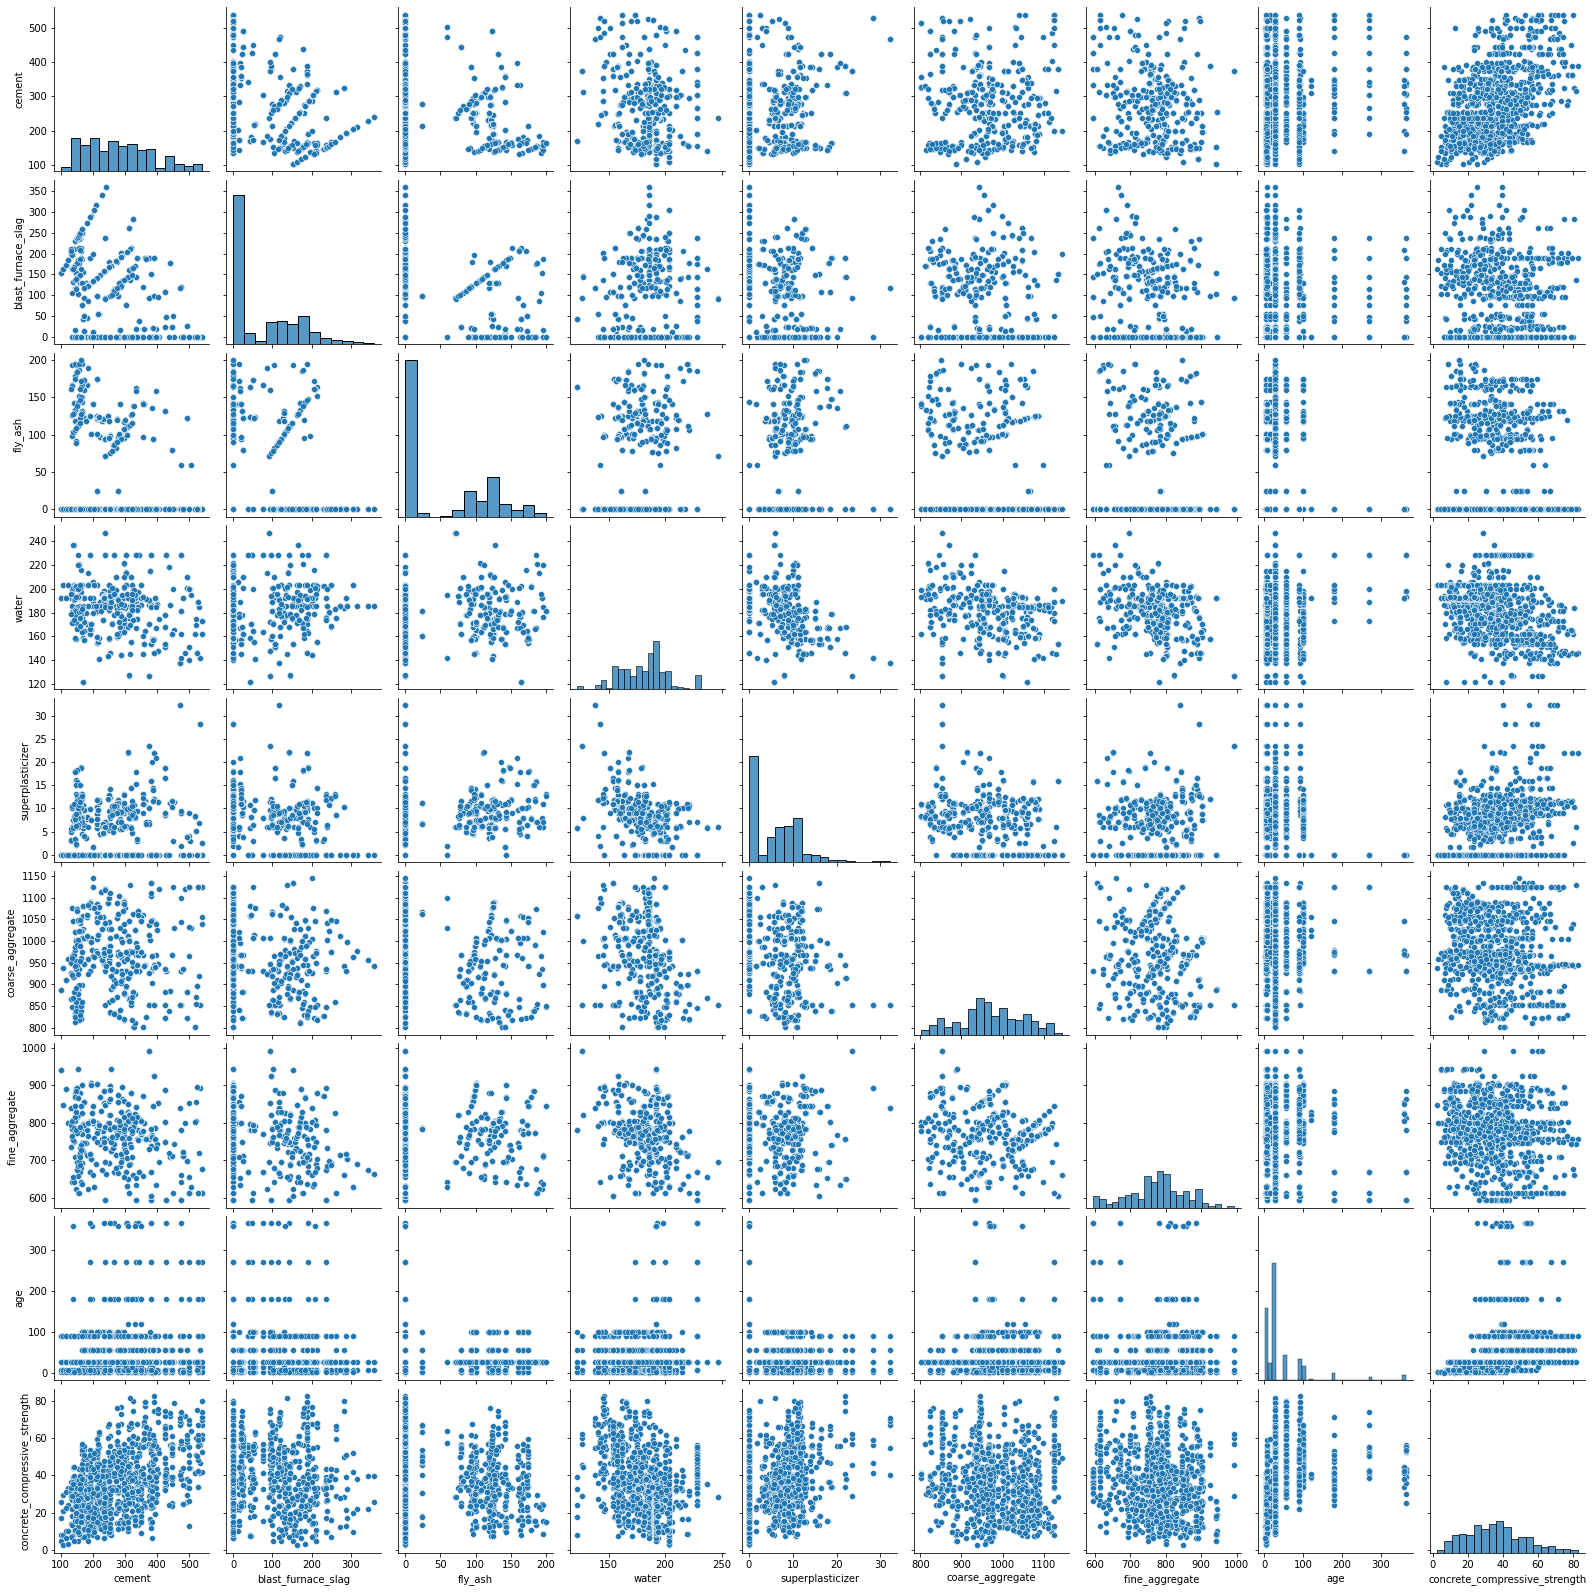

In [10]:
plt.figure(figsize=(12,6))
sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='concrete_compressive_strength'>

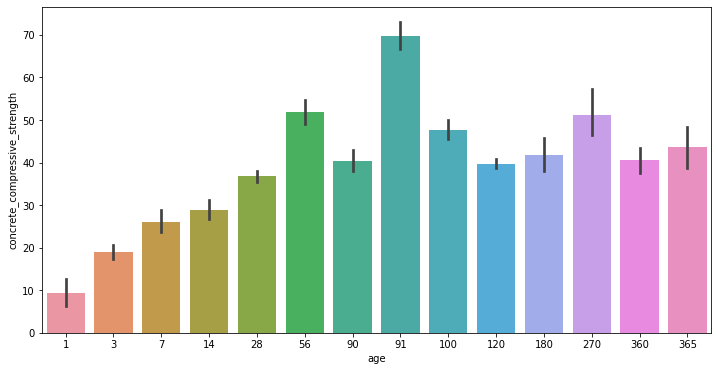

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x="age",y="concrete_compressive_strength",data=df)

In [12]:
df_copy = df.copy()

<AxesSubplot:xlabel='age'>

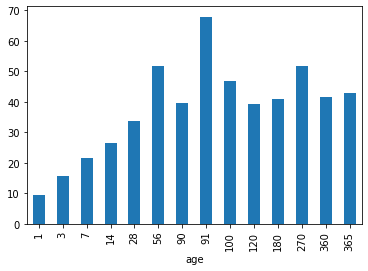

In [13]:
df_copy.groupby('age')['concrete_compressive_strength'].median().plot.bar()

In [14]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

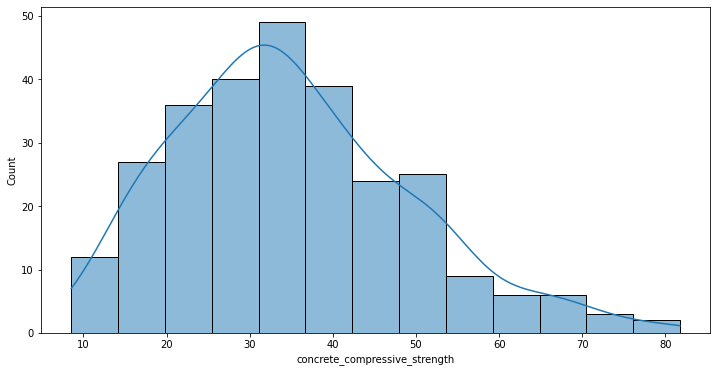

In [15]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('cement')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

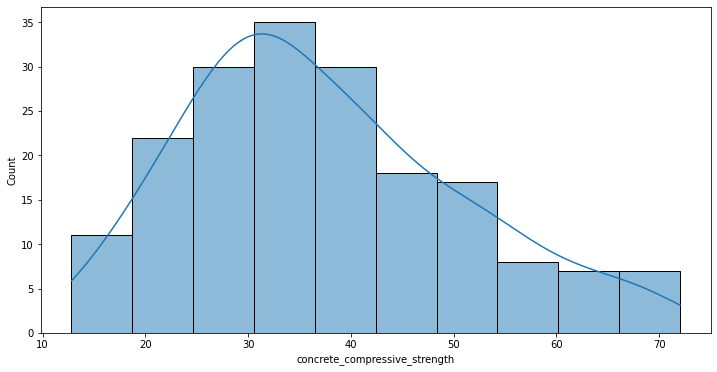

In [16]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('blast_furnace_slag')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

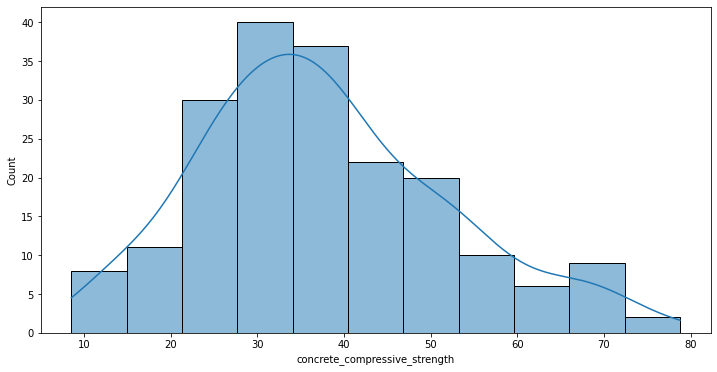

In [17]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('water')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

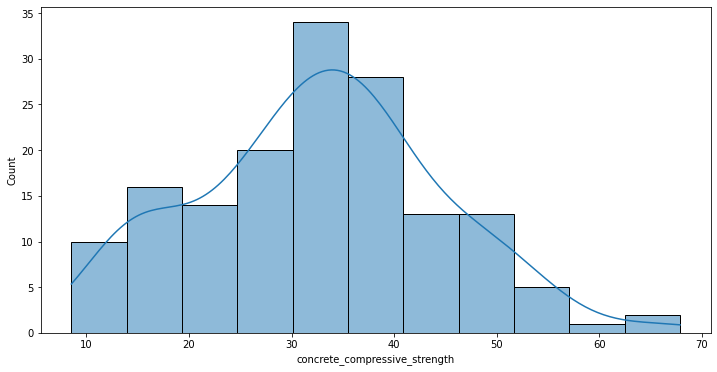

In [18]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('fly_ash')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

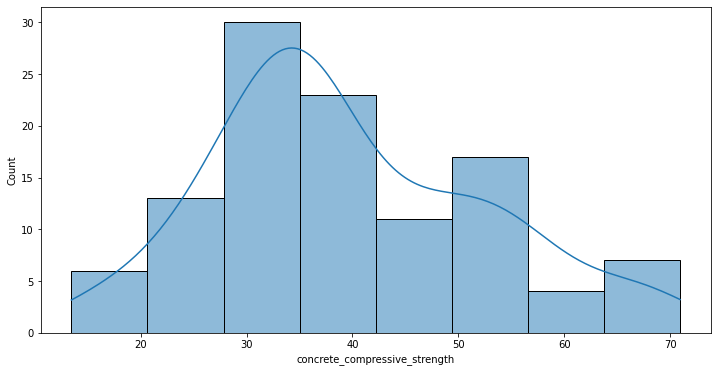

In [19]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('superplasticizer')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

In [20]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

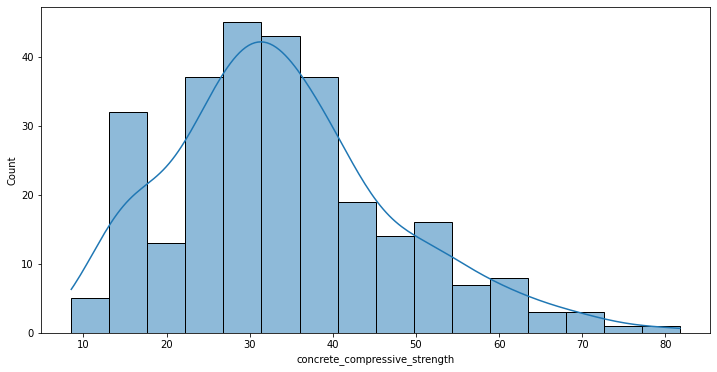

In [21]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('coarse_aggregate')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

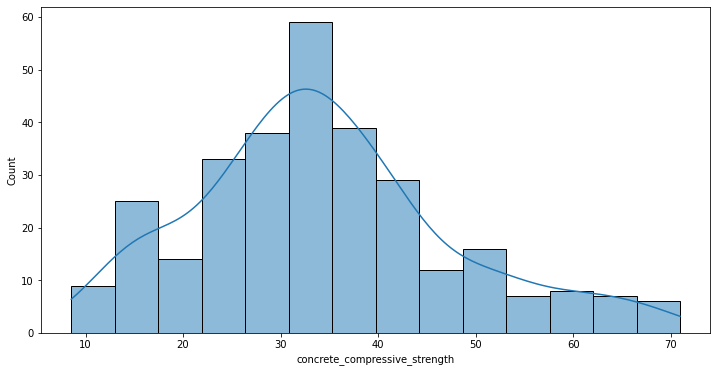

In [22]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('fine_aggregate ')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

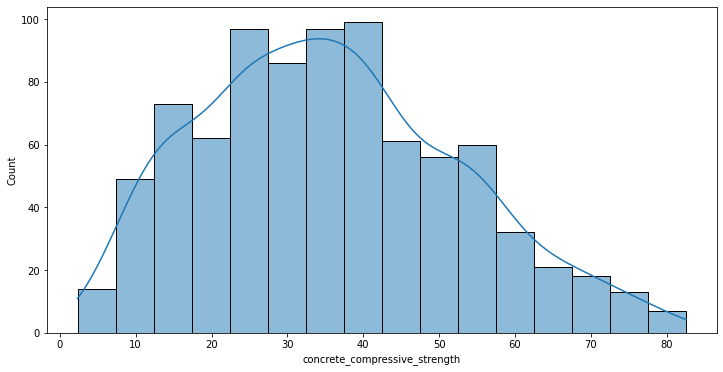

In [23]:
plt.figure(figsize=(12,6))
df_copy = df.copy()
a = df_copy.groupby('concrete_compressive_strength')['concrete_compressive_strength'].median()
sns.histplot(data=a,kde=True)

<AxesSubplot:xlabel='age'>

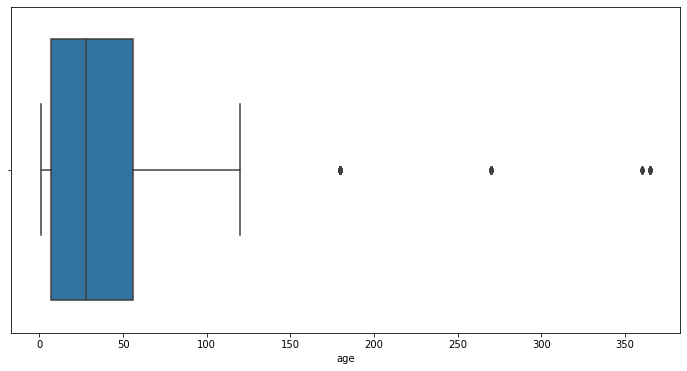

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='age',data=df)

In [25]:
df['age'] = np.log(df['age'])

<AxesSubplot:xlabel='age'>

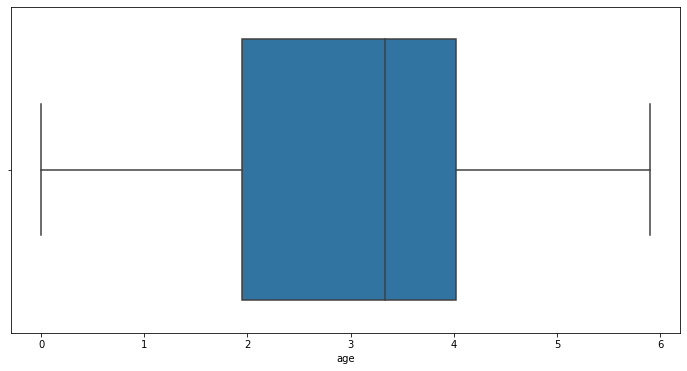

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='age',data=df)

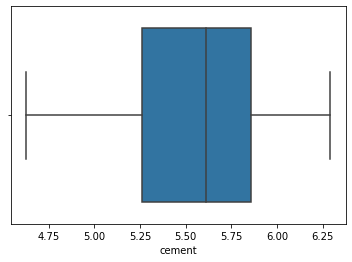

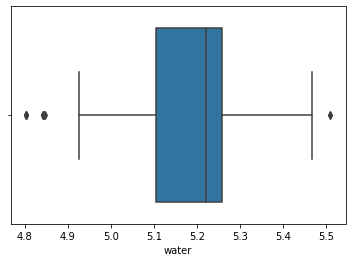

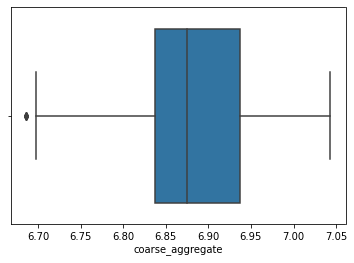

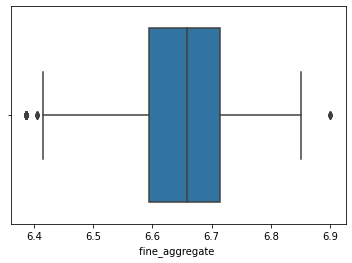

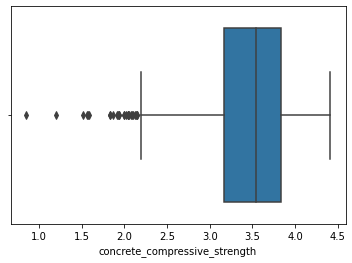

In [28]:
for feature in df.columns:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        sns.boxplot(x=feature,data=df)
        plt.show()

In [31]:
df.head(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,6.291569,0.0,0.0,5.087596,2.5,6.946976,6.516193,3.332205,4.381902
1,6.291569,0.0,0.0,5.087596,2.5,6.961296,6.516193,3.332205,4.125359
2,5.806640,142.5,0.0,5.429346,0.0,6.837333,6.386879,5.598422,3.695607
3,5.806640,142.5,0.0,5.429346,0.0,6.837333,6.386879,5.899897,3.714791
4,5.291293,132.4,0.0,5.257495,0.0,6.885919,6.715989,5.886104,3.790985


In [32]:
X = df.drop('concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

In [34]:
X.shape

(1030, 8)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824,), (206,))

## Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [39]:
linear_regression_model = LinearRegression()

In [40]:
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [41]:
predictions = linear_regression_model.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

In [46]:
linear_score = r2_score(predictions,y_test)
print("Accuracy Score : ",linear_score*100)

Accuracy Score :  78.71846921911718


## Ridge Regressor

In [49]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

predictions = ridge_model.predict(X_test)
ridge_score = r2_score(predictions,y_test)

print("Accuracy Score : ",ridge_score*100)

Accuracy Score :  77.6578009457518


In [97]:
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor

## AdaBoost  Regressor

In [67]:
ada_model = AdaBoostRegressor()

In [68]:
ada_model.fit(X_train,y_train)

AdaBoostRegressor()

In [69]:
ada_predict = ada_model.predict(X_test)

In [70]:
ada_score = r2_score(ada_predict,y_test)

In [72]:
print("Accuracy Score : ",ada_score*100)

Accuracy Score :  68.92204117638676


## Gradiet Boost Regressor

In [74]:
gb_model = GradientBoostingRegressor()

In [75]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [76]:
gb_predict = gb_model.predict(X_test)

In [78]:
gb_score = r2_score(gb_predict,y_test)

In [80]:
print("Accuracy Score : ",gb_score*100)

Accuracy Score :  90.99168476556798


## Random Forest Regressor

In [98]:
rf_model = RandomForestRegressor()

In [99]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [100]:
rf_predict = rf_model.predict(X_test)

In [102]:
rf_score = r2_score(rf_predict,y_test)

In [105]:
print("Accuracy Score : ",rf_score*100)

Accuracy Score :  88.057559444121


# Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
dt_model = DecisionTreeRegressor()

In [108]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [110]:
dt_predict = dt_model.predict(X_test)

In [112]:
dt_score = r2_score(dt_predict,y_test)

In [113]:
print("Accuracy Score : ",dt_score*100)

Accuracy Score :  80.8465608607504


## Conclusion : We get highest r2 score of 90.99% for Gradient Boost Regressor.